In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import plot as plt

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
#הנתונים נם נתוני אמת על ניתוחי תמונות שהוצאו מבדיקות סרטן השד אצל נשים

In [3]:
df = pd.read_csv("data.csv")
df2 = pd.DataFrame(data= None,columns=df.columns)

In [31]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
for index,row in df.iterrows():
    if row['diagnosis'] == 'M':
        row['diagnosis'] =1
    elif row ['diagnosis'] == 'B':
        row['diagnosis'] =2
    else:
        row['diagnosis'] =0
    df2 = df2.append(row,ignore_index=True)

In [30]:
df3 = df2.fillna(value=0, axis=1)
df3.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
X = df3.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

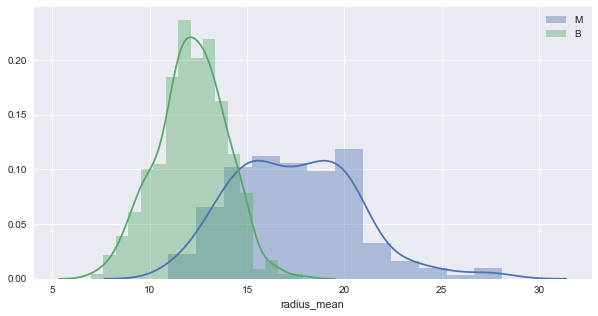

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df3[df3['diagnosis']==1].radius_mean.dropna(), label = 'M', ax = ax)
ax = sns.distplot(df3[df3['diagnosis']==2].radius_mean.dropna(), label = 'B', ax = ax)
ax.legend()

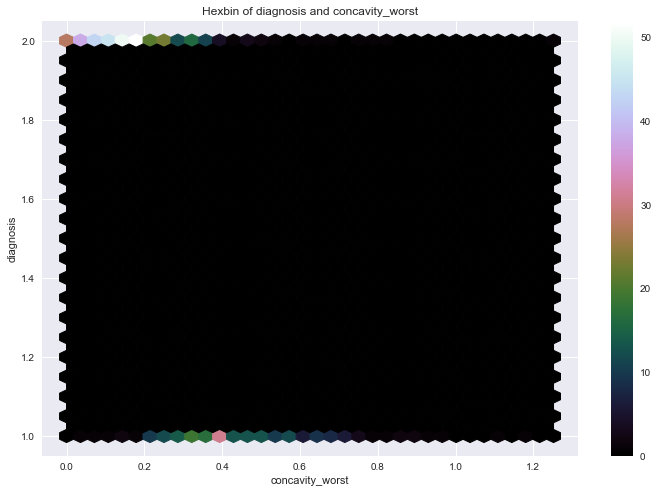

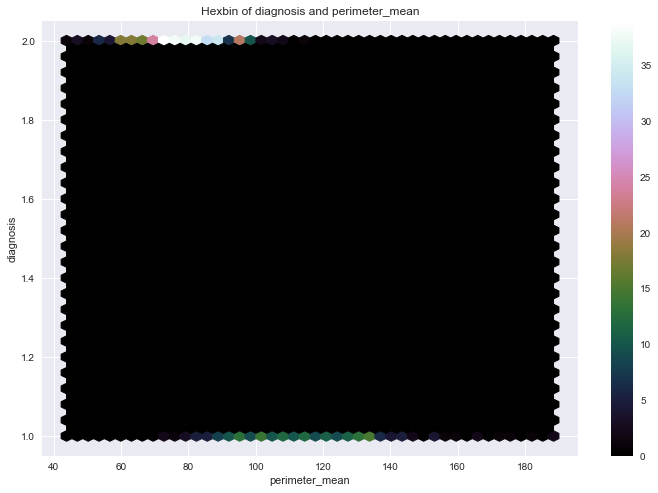

In [8]:
df2.plot(y= 'diagnosis', x ='concavity_worst',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of diagnosis and concavity_worst',figsize=(12,8))
df2.plot(y= 'diagnosis', x ='perimeter_mean',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of diagnosis and perimeter_mean',figsize=(12,8))

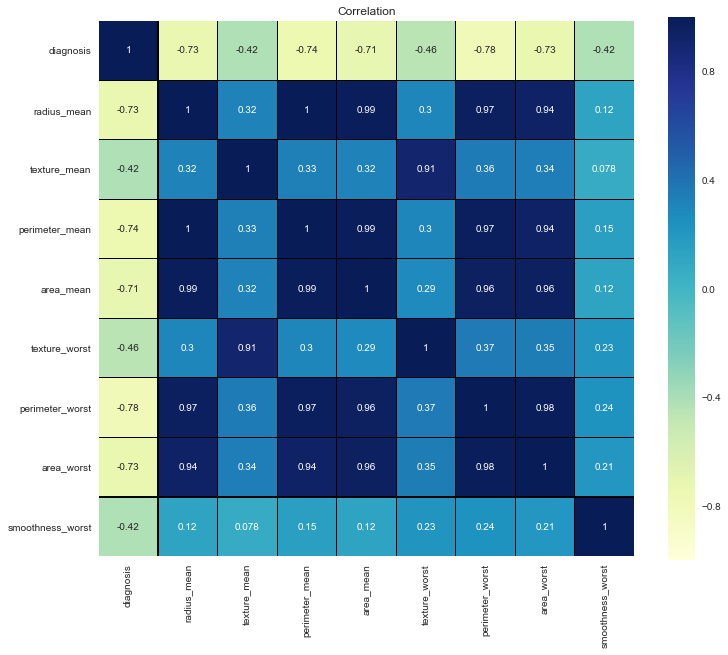

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation')
# Draw the heatmap using seaborn
df4 = df3[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean']].copy
sns.heatmap(df3[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','texture_worst','perimeter_worst','area_worst','smoothness_worst']].astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [10]:
X=df[df.columns[2:32]]
y=df[df.columns[1]]

In [11]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [12]:
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

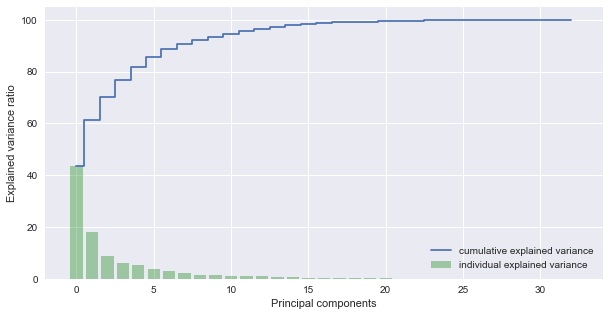

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(range(33), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(33), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, stratify=y)

In [15]:
X_train.shape

(426, 30)

In [16]:
X_test.shape

(143, 30)

In [17]:
knr = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train)
print("train score - " + str(knr.score(X_train, y_train)))
print("test score - " + str(knr.score(X_test, y_test)))

train score - 0.908450704225
test score - 0.923076923077


In [18]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
print("train score - " + str(lr.score(X_train, y_train)))
print("test score - " + str(lr.score(X_test, y_test)))

train score - 0.950704225352
test score - 0.965034965035


In [19]:
lr = LogisticRegression(C=2, random_state=0).fit(X_train, y_train)
print("train score - " + str(lr.score(X_train, y_train)))
print("test score - " + str(lr.score(X_test, y_test)))

train score - 0.957746478873
test score - 0.972027972028


In [20]:
svc = LinearSVC(random_state=0).fit(X_train,y_train)
print("train score - " + str(svc.score(X_train, y_train)))
print("test score - " + str(svc.score(X_test, y_test)))

train score - 0.934272300469
test score - 0.93006993007


In [21]:
svc = LinearSVC(C=3, random_state=0).fit(X_train,y_train)
print("train score - " + str(svc.score(X_train, y_train)))
print("test score - " + str(svc.score(X_test, y_test)))

train score - 0.934272300469
test score - 0.93006993007


In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_scaled = LinearSVC(C=2, random_state=0).fit(X_train_scaled,y_train)
print("train score - " + str(svc_scaled.score(X_train_scaled, y_train)))
print("test score - " + str(svc_scaled.score(X_test_scaled, y_test)))

train score - 0.990610328638
test score - 0.986013986014


In [23]:
dec = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("train score - " + str(dec.score(X_train, y_train)))
print("test score - " + str(dec.score(X_test, y_test)))

train score - 1.0
test score - 0.944055944056


In [24]:
dec = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
print("train score - " + str(dec.score(X_train, y_train)))
print("test score - " + str(dec.score(X_test, y_test)))

train score - 0.995305164319
test score - 0.958041958042


In [25]:
forest = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
print("train score - " + str(forest.score(X_train, y_train)))
print("test score - " + str(forest.score(X_test, y_test)))

train score - 0.995305164319
test score - 0.958041958042


In [26]:
forest = RandomForestClassifier(n_estimators=100, max_features=30, max_depth=5, random_state=0).fit(X_train, y_train)
print("train score - " + str(forest.score(X_train, y_train)))
print("test score - " + str(forest.score(X_test, y_test)))

train score - 0.99765258216
test score - 0.965034965035


In [27]:
gb = GradientBoostingClassifier().fit(X_train, y_train)
print("train score - " + str(gb.score(X_train, y_train)))
print("test score - " + str(gb.score(X_test, y_test)))

train score - 1.0
test score - 0.979020979021


In [28]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.15).fit(X_train, y_train)
print("train score - " + str(gb.score(X_train, y_train)))
print("test score - " + str(gb.score(X_test, y_test)))

train score - 1.0
test score - 0.979020979021


In [29]:
print("Support Vector Machine test score - " + str(svc_scaled.score(X_test_scaled, y_test)))
print("Gradient Boosting test score - " + str(gb.score(X_test, y_test)))
print("Logistic Regression test score - " + str(lr.score(X_test, y_test)))

Support Vector Machine test score - 0.986013986014
Gradient Boosting test score - 0.979020979021
Logistic Regression test score - 0.972027972028
